---
title: Exploring fastai API levels to create Data Loaders  
author: "Francisco Mussari"  
date: 2023-02-02  
image: "fastai API levels.PNG"  
categories: [fastai, deeplearning, dataloaders, API, transforms,  Walk with fastai]  
format:
  html:
    toc: true
    toc-depth: 3
    
---

## Intro
In the first lesson of the course [Walk with fastai, the missing pieces for success](https://muellerzr.github.io/fastblog/2022/10/22/Walkwithfastai.html), [Zachary Mueller](https://twitter.com/TheZachMueller) explained to us the three levels he sees in fastai APIs. This is different to Jeremy Howard's consideration, who see two levels.  

By the second lesson we had made use of those levels with different datasets.  

In this post we are going to explore the three levels with [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset, and in the process we will also go step by step in some fastai pieces that were not obvious for me in my beginnings.

## Importing fastai library and data

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST); path, path.ls()

(Path('/home/fmussari/.fastai/data/mnist_png'),
 (#2) [Path('/home/fmussari/.fastai/data/mnist_png/training'),Path('/home/fmussari/.fastai/data/mnist_png/testing')])

In [ ]:
(path/'training').ls()

(#10) [Path('/home/fmussari/.fastai/data/mnist_png/training/4'),Path('/home/fmussari/.fastai/data/mnist_png/training/7'),Path('/home/fmussari/.fastai/data/mnist_png/training/9'),Path('/home/fmussari/.fastai/data/mnist_png/training/5'),Path('/home/fmussari/.fastai/data/mnist_png/training/8'),Path('/home/fmussari/.fastai/data/mnist_png/training/0'),Path('/home/fmussari/.fastai/data/mnist_png/training/2'),Path('/home/fmussari/.fastai/data/mnist_png/training/1'),Path('/home/fmussari/.fastai/data/mnist_png/training/6'),Path('/home/fmussari/.fastai/data/mnist_png/training/3')]

We can see that the data is stored in **training** and **testing** folders.  
Each image is then stored in folders that represent its labels: `0`, `1`, `2`, ... `9`.

## File names and transforms

In [ ]:
fnames = get_image_files(path)
fnames

(#70000) [Path('/home/fmussari/.fastai/data/mnist_png/training/4/47823.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/45709.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/49105.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/746.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/13451.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/54187.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/30554.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/30886.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/52580.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/38515.png')...]

### Item and Batch transforms

In [ ]:
item_tfms = [CropPad(34), RandomCrop(size=28), ToTensor()]
batch_tfms = [IntToFloatTensor(), Normalize()]

#### Transforms in action
Here we are going to explore what each transform does.

In [ ]:
im = PILImageBW.create(fnames[0])
im

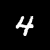

In [ ]:
CropPad(50)(im)

In [ ]:
RandomCrop(size=28)(CropPad(50)(im))

Applying the first two sequentially with `reduce`:

In [ ]:
from functools import reduce
reduce(lambda t,f: f(t), item_tfms[:2], im)

Or with a for loop:

In [ ]:
im0 = im
for tfm in item_tfms[:2]:
    im0 = tfm(im0)
im0

What about applying also `ToTensor()`

In [ ]:
reduce(lambda t,f: f(t), item_tfms, im).shape

torch.Size([1, 28, 28])

## High Level API
For this level we are going to use `ImageDataLoaders`, let's explore some of its methods:

In [ ]:
print([f for f in dir(ImageDataLoaders) if f[:4]=='from'])

['from_csv', 'from_dblock', 'from_df', 'from_dsets', 'from_folder', 'from_lists', 'from_name_func', 'from_name_re', 'from_path_func', 'from_path_re']


For this dataset `from_folder` method is the way to go.

In [ ]:
help(ImageDataLoaders.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None, batch_tfms=None, img_cls=<class 'fastai.vision.core.PILImage'>, *, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) method of builtins.type instance
    Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)



### Data Loaders

In [ ]:
dls = ImageDataLoaders.from_folder(
    path, train='training', valid='testing',
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

In [ ]:
type(dls)

fastai.data.core.DataLoaders

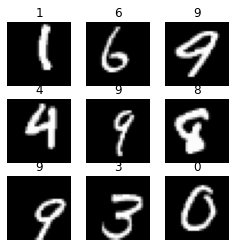

In [ ]:
dls.show_batch(figsize=(4,4))

In [ ]:
dls.bs #default batch size

64

In [ ]:
print(dls.vocab.o2i)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [ ]:
dls.train_ds, dls.valid_ds

((#60000) [(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4))...],
 (#10000) [(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size=28x28, TensorCategory(4)),(PILImage mode=RGB size

## Mid Level API
With the mid level API we define blocks according to the problem. In this case we have image inputs and categories to predict.

### `blocks`

In [ ]:
blocks = (ImageBlock(cls=PILImageBW), CategoryBlock)

#### `GrandparentSplitter` and `parent_label`

It was transparent to us in the high level API, but what `from_folder` method used to split the dataset into train and valid was `GrandparentSplitter`. Lets see how it works:

In [ ]:
splitter = GrandparentSplitter(train_name='training', valid_name='testing')

Let's create a tiny subset of `fnames`, having **training** and **testing** samples, and see how `splitter` works:

In [ ]:
sub_fnames = fnames[:2] + fnames[-2:]
sub_fnames

(#4) [Path('/home/fmussari/.fastai/data/mnist_png/training/4/47823.png'),Path('/home/fmussari/.fastai/data/mnist_png/training/4/45709.png'),Path('/home/fmussari/.fastai/data/mnist_png/testing/3/7829.png'),Path('/home/fmussari/.fastai/data/mnist_png/testing/3/2300.png')]

In [ ]:
splitter(sub_fnames)

([0, 1], [2, 3])

We can see it is returnin a tuple with two list of indices, one for training, and one for validations, according to the folder the images are located in.

In [ ]:
t, v = splitter(fnames)
len(t), len(v)

(60000, 10000)

The high level API also used the `parent_label` function under the hood. It returns the label from the parent folder of each image.

In [ ]:
parent_label(sub_fnames[0]), parent_label(sub_fnames[2])

('4', '3')

In [ ]:
PILImageBW.create(sub_fnames[2])

### `DataBlock`

In [ ]:
dblock = DataBlock(
    blocks=blocks,
    get_items=get_image_files, 
    splitter=splitter,
    get_y=parent_label,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

In [ ]:
type(dblock)

fastai.data.block.DataBlock

### Data Loaders

In [ ]:
dls = dblock.dataloaders(path, bs=64)

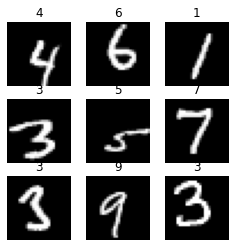

In [ ]:
dls.show_batch(figsize=(4,4))

In [ ]:
dls.bs

64

In [ ]:
print(dls.vocab.o2i)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [ ]:
dls.train_ds, dls.valid_ds

((#60000) [(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4))...],
 (#10000) [(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size

## Low Level API

We already created a `splitter`, lets now split the data.

In [ ]:
splits=splitter(fnames)
len(splits[0]), len(splits[1])

(60000, 10000)

### Datasets

In [ ]:
dsrc = Datasets(
    items=fnames,
    tfms=[[PILImageBW.create], [parent_label, Categorize]],
    splits=splits
)

In [ ]:
type(dsrc)

fastai.data.core.Datasets

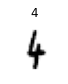

In [ ]:
show_at(dsrc.train, 3);

#### Exploring what each `tfms` does

In [ ]:
PILImageBW.create(fnames[0])

In [ ]:
l = parent_label(fnames[0])
l

'4'

In [ ]:
Categorize(l)

Categorize -- {'vocab': ['4'], 'sort': True, 'add_na': False}:
encodes: (Tabular,object) -> encodes
(object,object) -> encodes
decodes: (Tabular,object) -> decodes
(object,object) -> decodes

### Data Loaders

In [ ]:
dls = dsrc.dataloaders(
    bs=128,
    after_item=item_tfms,
    after_batch=batch_tfms
)

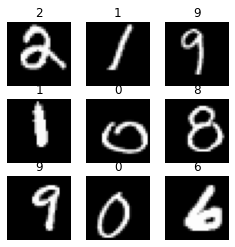

In [ ]:
dls.show_batch(figsize=(4,4))

In [ ]:
dls.bs

128

In [ ]:
print(dls.vocab.o2i)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [ ]:
dls.train_ds, dls.valid_ds

((#60000) [(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4))...],
 (#10000) [(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size

## Conclusion

- We ended with the same `DataLoaders` in three different ways.
- As Zachary puts it, the higher the level of the API, the lesser the flexibility, but also less complexity.
- He also pointed out that the mid level API is made with the building blocks of the framework.